## R - Regression model tests

---
#### First, we input some dummy data (highly simplified) based on a CPU usage % prediction use case, and get it to a matrix...


In [286]:
cpu = c(5.5, 5.95, 6.63, 7.56, 8.72, 9.37, 9.92, 10.17, 11.08, 12.5, 13.75, 13.66, 13.85, 14.15, 14.89, 14.99, 14.84, 14.48, 14.54, 14.4, 14.6, 14.97, 15.11, 14.83, 15.08, 15.13, 15.86, 15.94)
subs = c(9552, 9680, 9731, 11666, 14675, 15265, 15484, 15723, 16501, 16890, 17203, 17707, 18108, 18266, 19308, 18224, 18997, 19505, 19800, 19546, 19117, 18774, 17813, 17304, 16756, 16749, 16925, 17231)
trans = c(1923, 1961, 1979, 2030, 2112, 2192, 2235, 2351, 2411, 2475, 2524, 2674, 2833, 2863, 2839, 2898, 3123, 3195, 3239, 3129, 3100, 3008, 2983, 3069, 3151, 3127, 3179, 3207)
mem = c(8, 7, 7, 8, 7, 6, 7, 6, 6, 8, 8, 8, 7, 8, 10, 9, 8, 6, 7, 8, 7, 9, 10, 8, 9, 9, 9, 8)

In [287]:
mydata <- data.frame(cpu, subs, trans, mem)
mydata

cpu,subs,trans,mem
5.50,9552,1923,8
5.95,9680,1961,7
6.63,9731,1979,7
7.56,11666,2030,8
8.72,14675,2112,7
9.37,15265,2192,6
9.92,15484,2235,7
10.17,15723,2351,6
11.08,16501,2411,6
12.50,16890,2475,8


---
#### Now, let's plot the scatter of all variables to identify relationship (i.e. which variables are most related to which)...

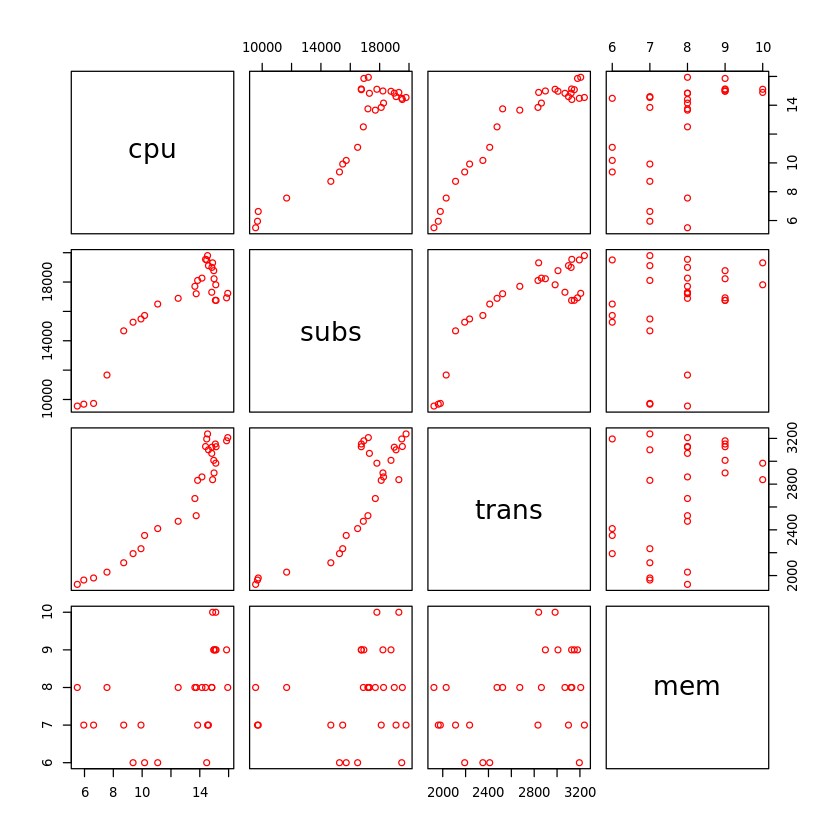

In [288]:
plot(mydata,col="red")

---
#### Now let's start modeling with linear regression.
#### We will try different options, first a Generalized Linear Model (GLM) from R with default family (i.e. Gaussian)...

In [289]:
### Model: Linear Regression

# fit model
fit1 <- glm( cpu ~ subs + trans + mem, data=mydata)
summary(fit1)



Call:
glm(formula = cpu ~ subs + trans + mem, data = mydata)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-1.27252  -0.39759   0.09649   0.43339   1.41264  

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -9.057e+00  1.034e+00  -8.755 6.17e-09 ***
subs         4.682e-04  8.225e-05   5.693 7.29e-06 ***
trans        3.699e-03  5.729e-04   6.457 1.12e-06 ***
mem          5.003e-01  1.264e-01   3.959 0.000584 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 0.4435362)

    Null deviance: 284.713  on 27  degrees of freedom
Residual deviance:  10.645  on 24  degrees of freedom
AIC: 62.381

Number of Fisher Scoring iterations: 2


---
#### Let´s check the model accuracy, for this we will use the Mean Squared Error (MSE) and compare with the same input data set (just for simplicity of this excercise) - Note values closer to 0 are better...

In [290]:
newdata <- data.frame(subs, trans, mem)
predictions1=predict(fit1, newdata, type = "response")
# summarize accuracy
mse1 <- mean((mydata$cpu - predictions1)^2)
print(mse1)

[1] 0.3801739


---
#### Let´s plot the original values and predicted values for the CPU usage % with this model. Note the MSE and how the prediction "fits" with the original values...

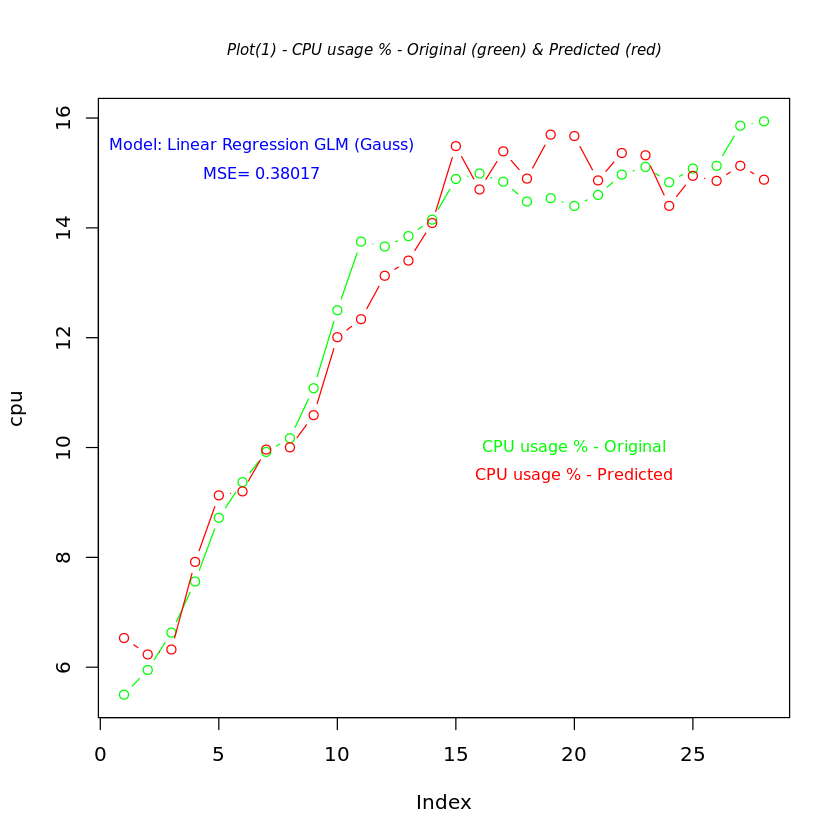

In [291]:
plot(cpu,type="b",col="green")
lines(predictions1,type="b",col="red")
title("Plot(1) - CPU usage % - Original (green) & Predicted (red)",
      cex.main = 0.75,   font.main= 3, col.main= "black")
text(6.8, 15.5, "Model: Linear Regression GLM (Gauss)", cex=0.8, col="blue")
text(6.8, 15, paste("MSE=",round(mse1, digits=5)), cex=0.8, col="blue")
text(20, 10, "CPU usage % - Original", cex=0.8, col="green")
text(20, 9.5, "CPU usage % - Predicted", cex=0.8, col="red")

---
#### Next, let's evaluate another regression algorithm, this time a Multivariate Adaptive Regression Splines (MARS) using the EARTH library from R...
#### Note and play with the parameters, specifically with the "penalty" and "degree"...

In [292]:
### Model: Multivariate Adaptive Regression Splines (MARS) - EARTH library

library(earth)

# fit model
fit2 <- earth(cpu~., mydata, penalty=2, degree=3)

# summarize the fit
summary(fit2)
# summarize the importance of input variables
evimp(fit2)

# make predictions
predictions2 <- predict(fit2, mydata)

# summarize accuracy
mse2 <- mean((mydata$cpu - predictions2)^2)
print(mse2)

Call: earth(formula=cpu~., data=mydata, degree=3, penalty=2)

              coefficients
(Intercept)     12.4951843
h(2475-trans)   -0.0122858
h(trans-2475)    0.0030983
h(mem-7)         0.4131440

Selected 4 of 7 terms, and 2 of 3 predictors
Termination condition: RSq changed by less than 0.001 at 7 terms
Importance: trans, mem, subs-unused
Number of terms at each degree of interaction: 1 3 (additive model)
GCV 0.2877842    RSS 4.532601    GRSq 0.9736835    RSq 0.9840801

      nsubsets   gcv    rss
trans        3 100.0  100.0
mem          1  11.0   10.9

[1] 0.1618786


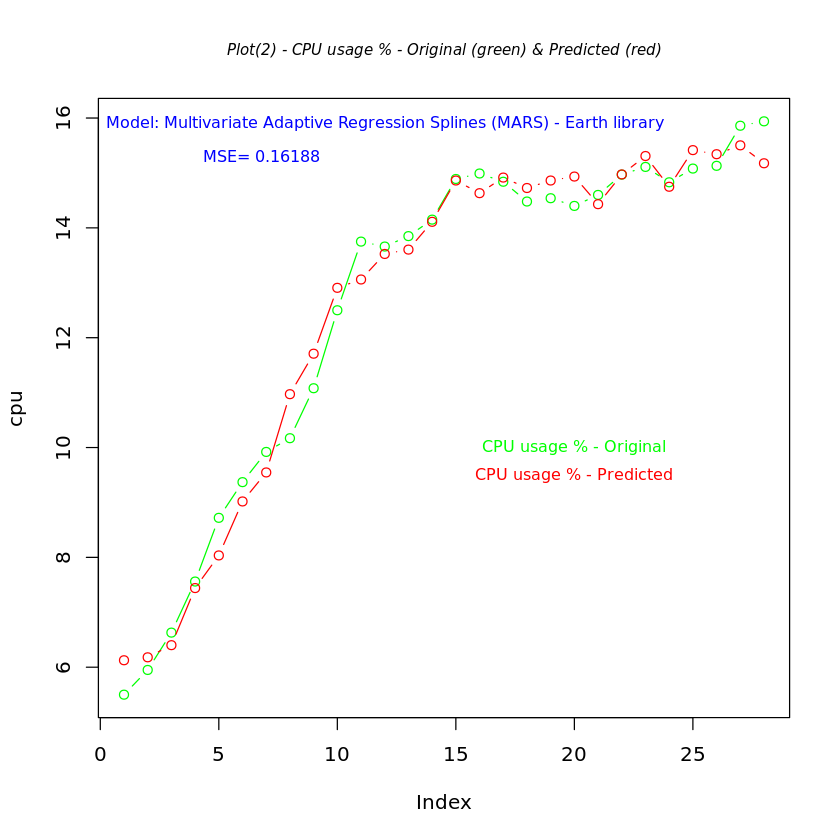

In [293]:
plot(cpu,type="b",col="green")
lines(predictions2,type="b",col="red")
title("Plot(2) - CPU usage % - Original (green) & Predicted (red)",
      cex.main = 0.75,   font.main= 3, col.main= "black")
text(12, 15.9, "Model: Multivariate Adaptive Regression Splines (MARS) - Earth library", cex=0.8, col="blue")
text(6.8, 15.3, paste("MSE=",round(mse2, digits=5)), cex=0.8, col="blue")
text(20, 10, "CPU usage % - Original", cex=0.8, col="green")
text(20, 9.5, "CPU usage % - Predicted", cex=0.8, col="red")

---
#### Finally, let's evaluate another MARS algorithm, now with the MDA library (the same from SageMaker r_bring_your_own_model example)...

In [294]:
### Model: Multivariate Adaptive Regression Splines (MARS) - MARS MDA library

#install.packages("earth")
library(mda)

#fit model 2 mars.R
fit3 <- mars(mydata[,-1], mydata[1], penalty=2, degree=3)
# summarize the fit
summary(fit3)

# make prediction
predictions3 <- predict(fit3, mydata[,-1], type = "posterior")
#print(predictions3)

# summarize accuracy
mse3 <- mean((mydata$cpu - predictions3)^2)
print(mse3)


               Length Class  Mode   
call             5    -none- call   
all.terms       16    -none- numeric
selected.terms   8    -none- numeric
penalty          1    -none- numeric
degree           1    -none- numeric
nk               1    -none- numeric
thresh           1    -none- numeric
gcv              1    -none- numeric
factor          63    -none- numeric
cuts            63    -none- numeric
residuals       28    -none- numeric
fitted.values   28    -none- numeric
lenb             1    -none- numeric
coefficients     8    -none- numeric
x              224    -none- numeric

[1] 0.0575538


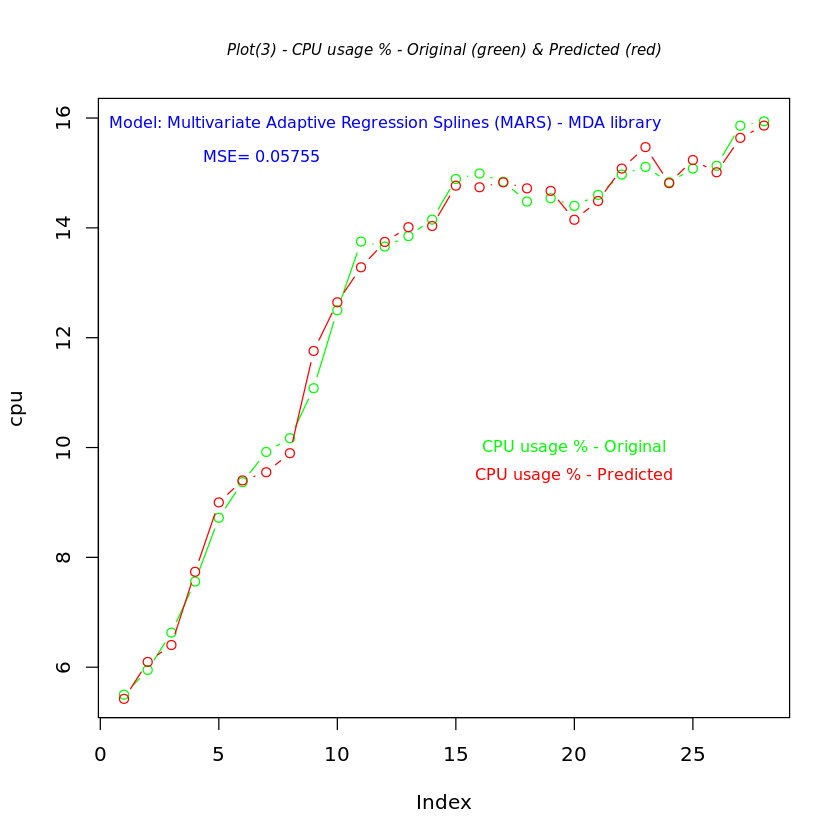

In [295]:
plot(cpu,type="b",col="green")
lines(predictions3,type="b",col="red")
title("Plot(3) - CPU usage % - Original (green) & Predicted (red)",
      cex.main = 0.75,   font.main= 3, col.main= "black")
text(12, 15.9, "Model: Multivariate Adaptive Regression Splines (MARS) - MDA library", cex=0.8, col="blue")
text(6.8, 15.3, paste("MSE=",round(mse3, digits=5)), cex=0.8, col="blue")
text(20, 10, "CPU usage % - Original", cex=0.8, col="green")
text(20, 9.5, "CPU usage % - Predicted", cex=0.8, col="red")